In [3]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

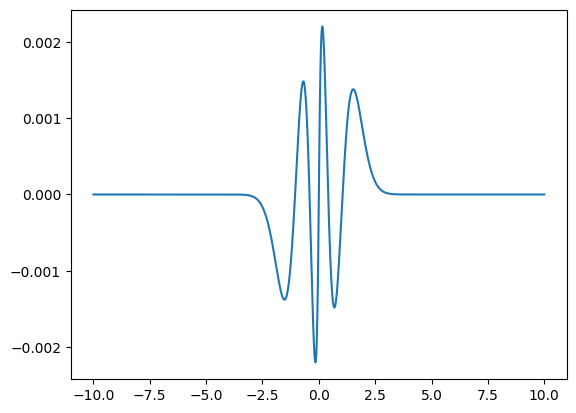

In [241]:
def erf_approx(x):
    a = 1.447443490823
    b = 2.643712850528
    x_abs = np.abs(x)
    return (1 - np.exp(-(2/b)*x_abs*(x_abs+a)))*np.sign(x)

x = np.linspace(-10, 10, 10_000)
diff = erf(x) - erf_approx(x)
plt.plot(x, diff)

In [120]:
def b_i(x, y, mu_2_x, mu_2_y, sigma, t_2):
    z2 = (x - mu_2_x)**2 + (y - mu_2_y)**2
    return np.exp(-0.5 * z2 / sigma**2 - 1/t_2) / (2 * np.pi * sigma**2)

In [129]:
x, y = np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
xx, yy = np.meshgrid(x, y)
zz = b_i(xx, yy, 0, 0, 1, np.inf)

In [130]:
np.sum(b_i(xx, yy, 0, 0, 1, np.inf)) * (x[1] - x[0]) * (y[1] - y[0])

0.9951272793584274

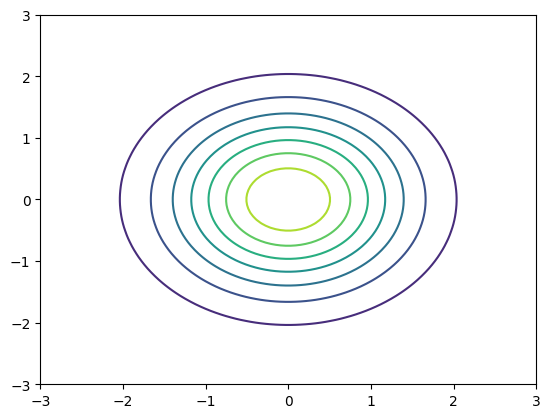

In [131]:
plt.contour(xx, yy, zz)
plt.show()

In [284]:
def b_ii(x, y, mu_1_x, mu_1_y, mu_2_x, mu_2_y, sigma, t_1, t_2):
    z2 = (x - mu_1_x)**2 + (y - mu_1_y)**2
    p_12 = 0.5 * z2 / sigma**2

    proj = (mu_1_x - x)*(mu_2_x - mu_1_x) + (mu_1_y - y)*(mu_2_y - mu_1_y)
    q_t2 = proj / sigma**2 - 1/t_1 + 1/t_2

    c2 = (mu_2_x - mu_1_x)**2 + (mu_2_y - mu_1_y)**2
    p_t22 = 0.5 *  c2 / sigma**2

    x_ = q_t2 / (2 * np.sqrt(p_t22))
    x_0_ = np.sqrt(p_t22)

    f1 = np.exp(-p_12 - 1/t_1 + 0.25*q_t2**2/p_t22) / (2 * np.pi * sigma**2 * t_2)
    f2 = np.sqrt(np.pi / p_t22) / 2
    f3 = erf(x_ + x_0_) - erf(x_)
    
    return f1*f2*f3

In [285]:
t_2 = 0.2
sigma = 0.4

x, y = np.linspace(-3, 3, 200), np.linspace(-3, 3, 200)
xx, yy = np.meshgrid(x, y)
zz = b_ii(xx, yy, 0, 0, 1, 1, sigma, np.inf, t_2) + b_i(xx, yy, 1, 1, sigma, t_2)

In [286]:
np.sum(zz) * (x[1] - x[0]) * (y[1] - y[0])

0.99999999503459

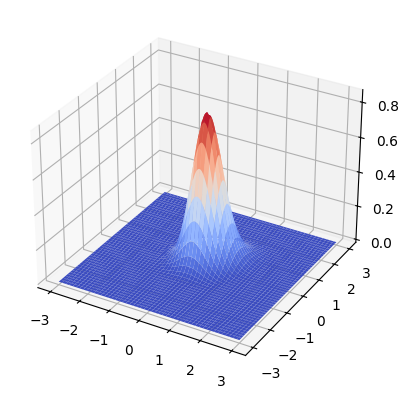

In [287]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(xx, yy, zz, cmap="coolwarm")
plt.show()

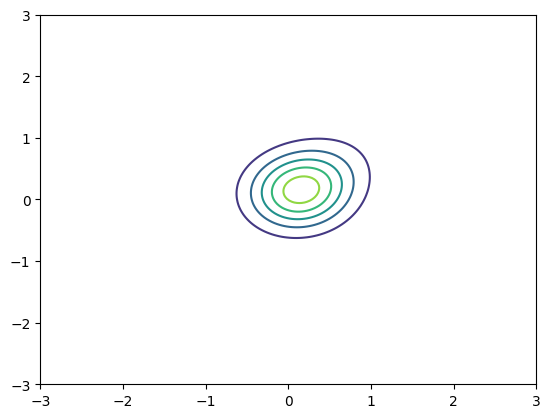

In [288]:
plt.contour(xx, yy, zz)
plt.show()

In [446]:
def b_iii(x, y, mu_0_x, mu_0_y, mu_1_x, mu_1_y, mu_2_x, mu_2_y, sigma, t_1, t_2):   
    a = 1.447443490823
    b = 2.643712850528
    
    p_13 = 0.5 / sigma**2 * ((x - mu_0_x)**2 + (y - mu_0_y)**2)
    p_s3 = ((mu_0_x - x)*(mu_1_x - mu_0_x) + (mu_0_y - y)*(mu_1_y - mu_0_y)) / sigma**2
    p_t3 = ((mu_0_x - x)*(mu_2_x - mu_0_x) + (mu_0_y - y)*(mu_2_y - mu_0_y)) / sigma**2
    p_s23 = 0.5 / sigma**2 * ((mu_0_x - mu_1_x)**2 + (mu_0_y - mu_1_y)**2)
    p_ts3 = ((mu_1_x - mu_0_x)*(mu_2_x - mu_0_x) + (mu_1_y - mu_0_y)*(mu_2_y - mu_0_y)) / sigma**2
    p_t23 = 0.5 / sigma**2 * ((mu_0_x - mu_2_x)**2 + (mu_0_y - mu_2_y)**2)
    
    q_s3 = p_s3 + 1/t_1
    q_t3 = p_t3 + 1/t_2

    r_13 = 0.25*(b-1)*q_s3**2/p_s23 + 0.5*a*q_s3/p_s23
    r_t3 = q_t3 - 0.5*q_s3*p_ts3/p_s23 + 0.5*b*q_s3 + 0.5*a*np.sqrt(p_s23)
    r_t23 = p_t23 - 0.25*p_ts3**3/p_s23 + 0.25*b*p_s23

    w_13 = -0.25*q_s3**2/p_s23 + 0.25*b*(q_s3+p_s23)**2/p_s23 + 0.5*a*(q_s3+p_s23)/np.sqrt(p_s23)
    w_t3 = q_t3 - 0.5*q_s3*p_ts3*p_s23 + 0.5*b*(q_s3+p_s23)*(p_ts3-2*p_s23)/p_s23 + 0.5*a*(p_ts3-2*p_s23)/np.sqrt(p_s23)
    w_t23 = p_t23 - 0.25*p_ts3**2/p_s23 + 0.25*b*(p_ts3-2*p_s23)**2/p_s23

    X_ = r_t3 / (2 * np.sqrt(r_t23))
    X_0_ = np.sqrt(r_t23)
    Y_ = w_t3 / (2 * np.sqrt(w_t23))
    Y_0_ = np.sqrt(w_t23)

    f1 = np.exp(-p_13) / (8*sigma**2*t_1*t_2)
    f2 = np.sqrt(1/p_s23)
    f3a = np.exp(-r_13 + X_**2)*(erf(X_ + X_0_) - erf(X_))/X_0_
    f3b = np.exp(-w_13 + Y_**2)*(erf(Y_ + Y_0_) - erf(Y_))/Y_0_
    
    return f1*f2*(f3a + f3b)

In [447]:
t_1 = 10
t_2 = 10
sigma = 0.4

x, y = np.linspace(-3, 3, 200), np.linspace(-3, 3, 200)
xx, yy = np.meshgrid(x, y)
zz = b_iii(xx, yy, 1, 0, 0, 0, 2, 2, sigma, t_1, t_2) + b_ii(xx, yy, 0, 0, 2, 2, sigma, t_1, t_2) + b_i(xx, yy, 2, 2, sigma, t_2)

In [448]:
np.sum(zz) * (x[1] - x[0]) * (y[1] - y[0])

18675.32062506325

This is probably wrong because in the approximation I didn't take into account he sign of X, and the approximation is only valid for positive x. 

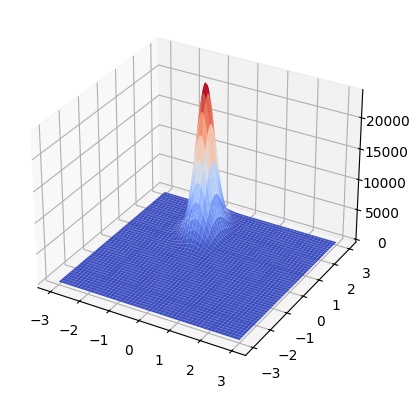

In [449]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(xx, yy, zz, cmap="coolwarm")
plt.show()

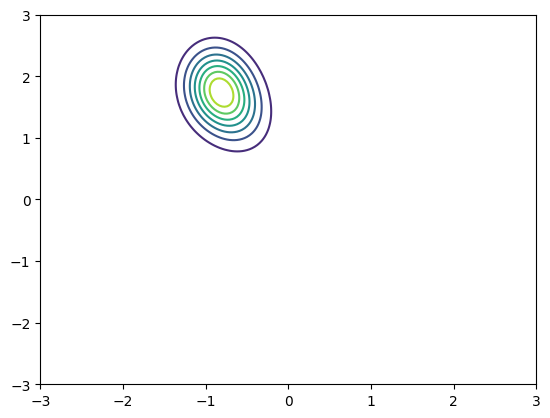

In [450]:
plt.contour(xx, yy, zz)
plt.show()